## Learning by Repeating Topical Data Analysis

### 1. Influenza national summary (green and yellow chart)

Warning message:
“Removed 16 rows containing missing values (position_stack).”Warning message:
“Removed 16 rows containing missing values (position_stack).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”

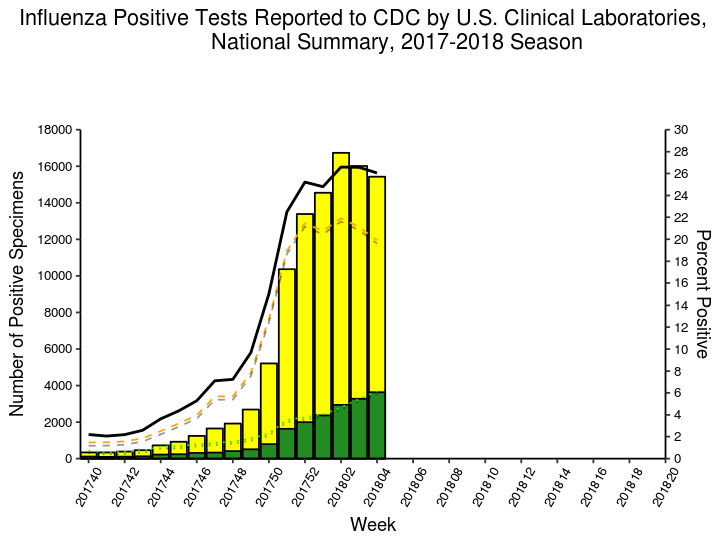

In [146]:
library(ggplot2)
library(repr)
options(repr.plot.width=6, repr.plot.height=4.5)
Nationalsummary <- read.csv("../data/National-Summary.csv")
# Nationalsummary$Week <- as.integer(Nationalsummary$Week)
Nationalsummary$Week <- factor(Nationalsummary$Week)
# Nationalsummary$Week <- numeric(as.character(Nationalsummary$Week))
g <- ggplot(Nationalsummary, aes(x=Week))+
geom_bar(aes(y=Total.B+Total.A),stat = "identity", fill = "yellow", color = "black", )+
geom_bar(aes(y=Total.B),stat = "identity", fill = "#228B22", color = "black")+
geom_line(aes(y=X..Positive*18000/30, group =1), colour= "black", size=0.8)+
geom_line(aes(y=Percent.Positive.A*18000/30, group =1), colour= "orange", linetype = 2, size=0.5)+
geom_line(aes(y=(Percent.Positive.A-0.3)*18000/30, group =1), colour= "black", linetype = 2, size=0.5, alpha="0.4")+
geom_line(aes(y=Percent.Positive.B*18000/30, group =1), colour= "green", linetype = "dotted", size=0.5)+
geom_line(aes(y=(Percent.Positive.B-0.2)*18000/30, group =1), colour= "black", linetype = "dotted", size=0.5, alpha="0.4")+

labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n National Summary, 2017-2018 Season\n\n\n")+
scale_y_continuous(expand = c(0,0),name="Number of Positive Specimens",sec.axis = sec_axis(~ . * 30 / 18000, name = "Percent Positive", breaks=seq(0,30, by=2)), breaks=seq(0,18000, by=2000))+
scale_x_discrete(expand = c(0,0), breaks=seq(201740,201820, by=2))+
coord_cartesian(ylim = c(0, 18000))+
theme_classic()+
theme(axis.text.x = element_text( color="black",size=8, angle=60, vjust=0.5),
        axis.text.y = element_text( color="black",size=8),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
       axis.line = element_line(colour = "black"),
     plot.title = element_text(size=13, hjust=0.6),
     legend.position = "bottom")
g

### 2. Influenza national summary (green and yellow chart)

Warning message:
“Removed 112 rows containing missing values (position_stack).”

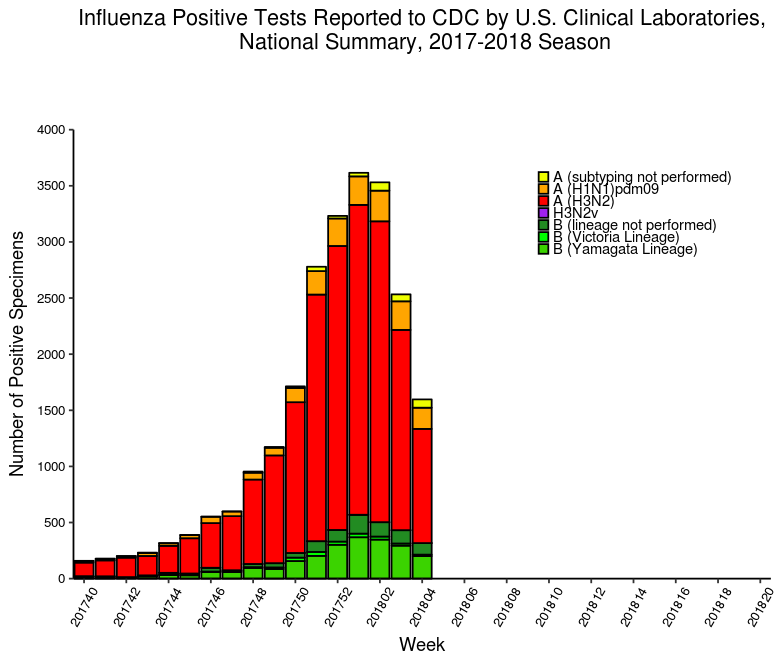

In [143]:
library(ggplot2)
library(repr)
library(reshape2)
options(repr.plot.width=6.5, repr.plot.height=5.5)
positiveTest <- read.csv("../data/positive1.csv")
# summary(positiveTest)
# positiveTest$Week <- c(positiveTest$Week, 201804:201820)
positiveTest$Week <- factor(positiveTest$Week)
# positiveTest$Week <- as.numeric(positiveTest$Week)
stacked <- melt(positiveTest, id.vars = "Week", measure.vars=c("ASNP","AH1N1pdm09", "AH3", "AH3N2v", "B", "BVIC", "BYAM"))
# stacked
# positiveTest$Week <- numeric(as.character(positiveTest$Week))
fill <- c("#eeff00", "orange", "red","purple","#228B22","green","#3bd300")
pos <- ggplot(stacked, aes(Week, value, fill = variable)) +
    geom_bar(stat = "identity", color="black") +
    scale_y_continuous(expand = c(0,0),name="Number of Positive Specimens", breaks=seq(0,4000, by=500))+
scale_x_discrete(expand = c(0,0.5), breaks=seq(201740,201820, by=2))+
coord_cartesian(ylim = c(0, 4000))+
scale_fill_manual(values=fill, guide = guide_legend(title = NULL, keywidth=0.1,
                 keyheight=0.1,
                 default.unit="inch"), 
                 labels=c("A (subtyping not performed)         ", "A (H1N1)pdm09       ", "A (H3N2)", "H3N2v", "B (lineage not performed)","B (Victoria Lineage)","B (Yamagata Lineage)"))+
# scale_color_manual(values="black")+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n National Summary, 2017-2018 Season\n\n\n")+
theme_classic()+
theme(axis.text.x = element_text( color="black",size=8, angle=60, vjust=0.5),
        axis.text.y = element_text( color="black",size=8),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
       axis.line = element_line(colour = "black"),
     plot.title = element_text(size=13, hjust=0.5),
#       legend.direction = 'vertical',
#       legend.key = element_rect(colour = 'white', fill = 'black', size = 0.5),
#       legend.key.size = unit(0.4, 'lines'),
#       legend.key.size = unit(0.2, "cm"),
      legend.justification=c(1,0), legend.position=c(1,0.7))
pos

### 3. Positive Tested

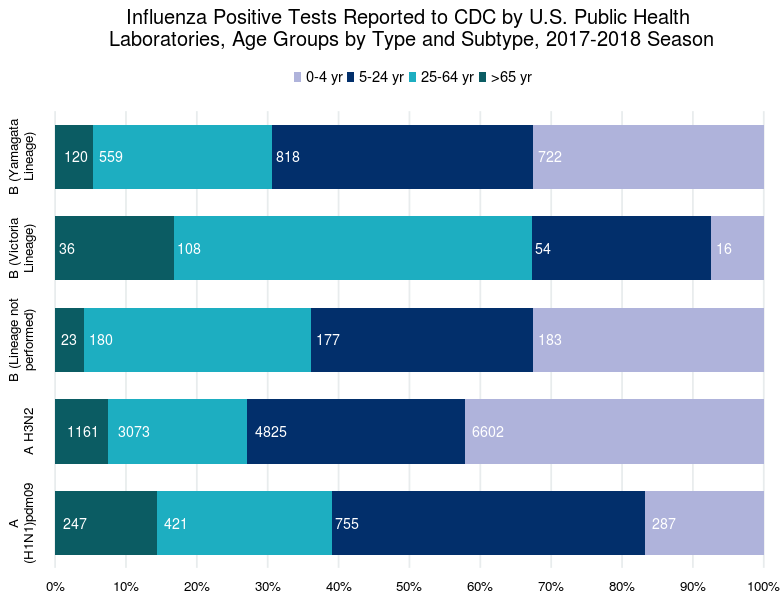

In [326]:
library(ggplot2)
library(reshape2)
library(scales)
library(repr)
options(repr.plot.width=6.5, repr.plot.height=5)
positiveTest <- read.csv("../data/VirusViewBySeason.csv")
# summary(positiveTest)
stacked <- melt(positiveTest, id.vars = "Virus", measure.vars=c("X.65.yr", "X25.64.yr","X5.24.yr", "X0.4.yr" ))
# stacked
fill <- c("#afb3db", "#022f6b", "#1daec1","#0b5c63")
pos <- ggplot(stacked, aes(Virus, value, fill = variable)) +
    geom_hline(yintercept=seq(0,1,by=0.1), color="#e8eced")+
    geom_bar(color="NA", position = "fill",stat = "identity", width=0.7) +
    geom_text(position = position_fill(vjust=-0.02), aes(x = Virus, y = value,label = value), colour = "white", size=3, hjust=-0.4)+
    scale_y_continuous(name=NULL,expand = c(0,0.01),breaks=seq(0,1, by=0.1),labels = percent_format())+
scale_x_discrete(name=NULL, expand = c(0,0.5),labels=c("A\n(H1N1)pdm09", "\nA H3N2", "B (Lineage not\nperformed)", "B (Victoria\nLineage)","B (Yamagata\nLineage)" ))+
# coord_cartesian(ylim = c(0, 1))+
scale_fill_manual(values=fill, guide = guide_legend(title = NULL),
                 labels=c("0-4 yr", "5-24 yr", "25-64 yr", ">65 yr"))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Public Health\n Laboratories, Age Groups by Type and Subtype, 2017-2018 Season")+
theme_classic()+
theme(axis.text.x = element_text( color="black",size=8, vjust=0.5),
        axis.text.y = element_text( color="black",size=8, angle=90, hjust=0.5),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
       axis.line = element_line(colour = "white"),
     plot.title = element_text(size=12, hjust=0.5),
      axis.ticks.length=unit(0.2, "cm"),
      axis.ticks = element_line(colour = "white", size = 0.5),
#       legend.direction = 'vertical',
#       legend.key = element_rect(colour = 'white', fill = 'white', size = 1),
      legend.key.size = unit(0.2, "cm"),
      legend.position="top")+
coord_flip()
pos

### 4. Influenza sub-type pie-charts

       Subtype  Genetic_Group     Number        SubtypeTotal
 B/Victoria:2   3C.2a  :1     Min.   :  0.00          :4    
 B/Yamagata:3   3C.2a1 :1     1st Qu.:  0.00          :2    
 H1pdm09   :3   3C.3   :1     Median : 10.00   100%   :2    
 H3        :5   3C.3a  :1     Mean   : 99.15   1%     :1    
                3C.3b  :1     3rd Qu.:104.00   16%    :1    
                6B     :1     Max.   :554.00   45%    :1    
                (Other):7                      (Other):2    

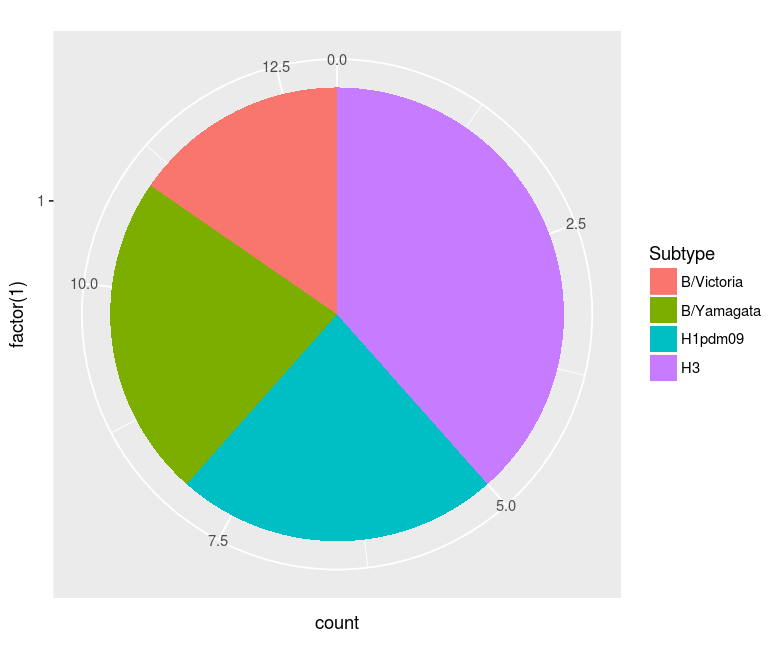

In [163]:
library(ggplot2)
library(repr)
library(reshape2)
# options(repr.plot.width=6.5, repr.plot.height=5.5)
pieChart <- read.csv("../data/Genetic04.csv")
summary(pieChart)
pie = ggplot(data = pieChart) + 
  geom_bar(mapping = aes(x = factor(1), fill = Subtype), width = 1) + 
  coord_polar(theta = "y")
pie

### 5. Pneumonia and Influenza (P&I) Mortality Surveillance:

In [329]:
library(ggplot2)
library(reshape2)
library(scales)
library(repr)
# options(repr.plot.width=6.5, repr.plot.height=5)
PImortality <- read.csv("../data/NCHSData04.csv")
summary(PImortality)
# stacked <- melt(positiveTest, id.vars = "Virus", measure.vars=c("X.65.yr", "X25.64.yr","X5.24.yr", "X0.4.yr" ))
# # stacked
# fill <- c("#afb3db", "#022f6b", "#1daec1","#0b5c63")
# pos <- ggplot(stacked, aes(Virus, value, fill = variable)) +
#     geom_hline(yintercept=seq(0,1,by=0.1), color="#e8eced")+
#     geom_bar(color="NA", position = "fill",stat = "identity", width=0.7) +
#     geom_text(position = position_fill(vjust=-0.02), aes(x = Virus, y = value,label = value), colour = "white", size=3, hjust=-0.4)+
#     scale_y_continuous(name=NULL,expand = c(0,0.01),breaks=seq(0,1, by=0.1),labels = percent_format())+
# scale_x_discrete(name=NULL, expand = c(0,0.5),labels=c("A\n(H1N1)pdm09", "\nA H3N2", "B (Lineage not\nperformed)", "B (Victoria\nLineage)","B (Yamagata\nLineage)" ))+
# # coord_cartesian(ylim = c(0, 1))+
# scale_fill_manual(values=fill, guide = guide_legend(title = NULL),
#                  labels=c("0-4 yr", "5-24 yr", "25-64 yr", ">65 yr"))+
# labs(title="Influenza Positive Tests Reported to CDC by U.S. Public Health\n Laboratories, Age Groups by Type and Subtype, 2017-2018 Season")+
# theme_classic()+
# theme(axis.text.x = element_text( color="black",size=8, vjust=0.5),
#         axis.text.y = element_text( color="black",size=8, angle=90, hjust=0.5),
#        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
#        axis.line = element_line(colour = "white"),
#      plot.title = element_text(size=12, hjust=0.5),
#       axis.ticks.length=unit(0.2, "cm"),
#       axis.ticks = element_line(colour = "white", size = 0.5),
# #       legend.direction = 'vertical',
# #       legend.key = element_rect(colour = 'white', fill = 'white', size = 1),
#       legend.key.size = unit(0.2, "cm"),
#       legend.position="top")+
# coord_flip()
# pos

      Year           Week         PIPercent         Expected    
 Min.   :2009   Min.   : 1.00   Min.   : 5.327   Min.   :5.477  
 1st Qu.:2011   1st Qu.:14.00   1st Qu.: 6.476   1st Qu.:6.485  
 Median :2013   Median :27.00   Median : 7.063   Median :7.076  
 Mean   :2013   Mean   :27.03   Mean   : 7.289   Mean   :7.112  
 3rd Qu.:2015   3rd Qu.:41.00   3rd Qu.: 8.005   3rd Qu.:7.756  
 Max.   :2018   Max.   :53.00   Max.   :11.099   Max.   :8.702  
   Threshold       All.Deaths    Pneumonia.Deaths Influenza.Deaths 
 Min.   :5.784   Min.   :40049   Min.   :2663     Min.   :   0.00  
 1st Qu.:6.824   1st Qu.:47301   1st Qu.:3076     1st Qu.:   5.75  
 Median :7.420   Median :49708   Median :3402     Median :  17.00  
 Mean   :7.439   Mean   :50018   Mean   :3579     Mean   :  83.93  
 3rd Qu.:8.094   3rd Qu.:51852   3rd Qu.:3984     3rd Qu.:  75.00  
 Max.   :9.046   Max.   :61212   Max.   :6033     Max.   :1088.00  